MLD_149_0001.nii.gz
MLD_149.nii.gz
(384, 384, 2) (248, 256, 5)


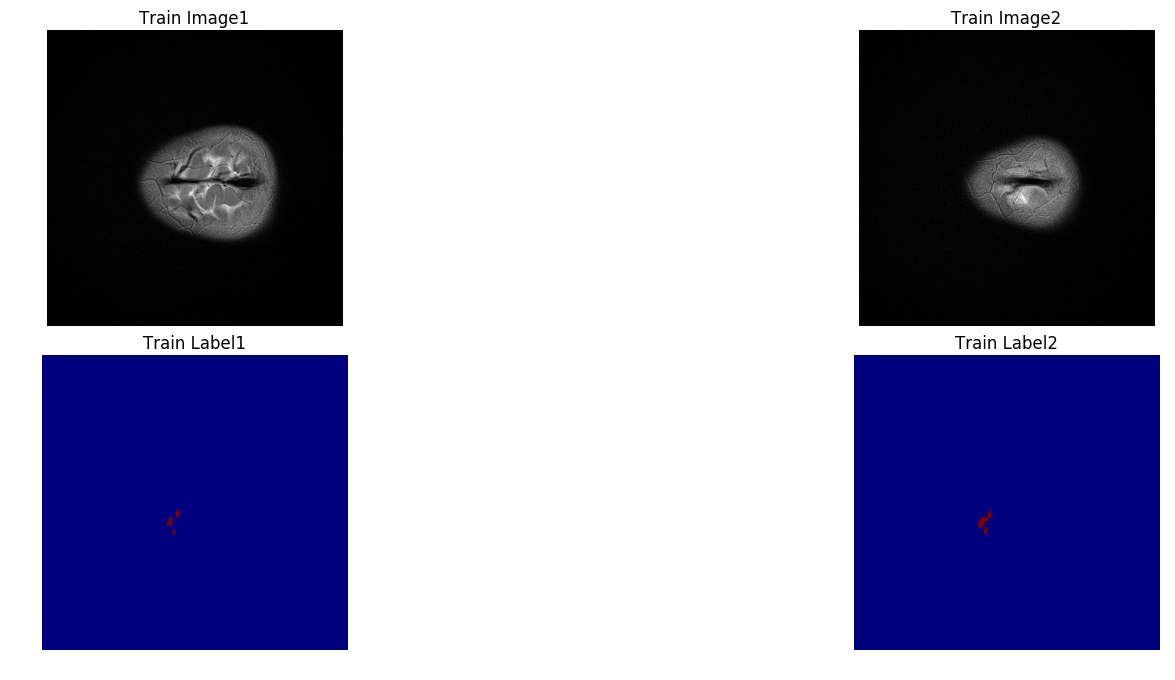

In [64]:

import numpy as np
#visualization of the dataset
import matplotlib.pyplot as plt
import nibabel as nib
import os
"""
This code was mostly used to data exploration and visualization of random slices in the MRI data
was also used to check basic characteristics of the dataset like shape between files.

"""

base_dir =  '/home/zamorano/'
task_name = "Task102_MLD" #change here for different task name
nnunet_dir = "nnUNet-container/data/nnUNet_raw/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_dir,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
main_dir = os.path.join(base_dir,'nnUNet-container/')

# random seleccion of slices 
np.random.seed(18)
#file to review
train_img_name='MLD_149_0001.nii.gz'

print(train_img_name)

train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)[:,:,25:30]
# print(train_img)
if train_img_name.endswith('_0000.nii.gz'):
    train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')] +'.nii.gz'
elif train_img_name.endswith('_0001.nii.gz'):
    train_label_name = train_img_name[:train_img_name.find('_0001.nii.gz')] +'.nii.gz'

print(train_label_name)

train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)[:,:,25:30]

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = train_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0 ,idx].imshow(train_img[:,:,idx], cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[:,:,idx])

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

